# ДЗ2. Семантическая близость (kaggle-соревнование)

## Введение

В этом задании вы будете решать задачу семантической релевантности пар постов и отправлять предсказания на Kaggle.

**Цель:** построить модель, которая по паре постов предсказывает, насколько тексты близки друг другу по смыслу.

Вся информация по заданию, данным, а также доступ к ним - только через закрытое соревнование.

Метрика качества: **Weighted F1-score** по всем классам.

Подробная разбалловка за ноутбук и соревнование описана ниже.


Вот несколько правил, который помогут нам сделать работу приятнее и продуктивнее:

- Можно использовать любые свободные источники с обязательным указанием ссылки на них. Если в работе вы используете генеративные модели, их указание обязательно. Иначе баллы за работу могут быть снижены. Также следите за оригинальностью: генеративного кода должно быть не более 60% работы.
- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.
- Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.

**Формат сдачи**

Задания сдаются через систему LMS. Посылка должна содержать:

- ноутбук `homework-02-Username.ipynb`  
  где `Username` - ваша фамилия латиницей, без пробелов (например, `homework-02-Ivanov.ipynb`);
- комментарий к посылке, в котором укажите ваш Kaggle nicknamе (по нему мы будем искать вас в лидерборде соревнования).

> Если вы используете дополнительные файлы (скрипты, сохранённые веса модели и т.п.), то либо:
> - делайте так, чтобы ноутбук мог их скачать сам (например, с Kaggle / Google Drive),  
> - либо приложите их архивом и явно опишите в ноутбуке, как ими пользоваться.  
> В идеале всё должно работать без ручных правок путей.

### Об оценивании

В этом домашнем задании у вас есть два источника баллов:

1. Баллы за ноутбук (за код, воспроизводимость и эксперименты)
2. Баллы за результат на Kaggle (Private leaderboard)

Важно: баллы за соревнование начисляются только при сданном ноутбуке.

**1) Баллы за ноутбук (максимум 8.0 баллов)**

За реализацию пайплайна в этом ноутбуке можно получить **до 8 баллов**.

Минимальная работа - 5.0 баллов.
Вы получаете 5 баллов, если ноутбук:

* запускается без ручных правок,
* делает подготовку данных,
* обучает/применяет модель (baseline),
* формирует корректный `submission.csv`,
* и вы сдаёте этот ноутбук в LMS.

Дальше можно добрать баллы:

* **+1.0 балл** - если вы преодолели минимальный бенчмарк на Kaggle (Public score ≥ `B_min`).
* **+1.0 балл** - за объёмные эксперименты: осмысленные сравнения подходов (например, несколько моделей/фич/стратегий, таблица результатов + короткие выводы что помогло и почему).
* **+1.0 балл** - если вы преодолели сильный бенчмарк на Kaggle (Public score ≥ `B_strong`).

> Пороговые значения **`B_min`** и **`B_strong`** будут указаны на странице Kaggle.

**2) Баллы за соревнование на Kaggle (до 2.0 баллов)**

Дополнительные баллы начисляются по вашему лучшему результату на приватном лидерборде (*Private leaderboard*) и только если у вас сдан воспроизводимый ноутбук.

Баллы за соревнование состоят из двух независимых бонусов:

A. Бонус за попадание в топ-10 (дополнительно):

* Если вы попали в топ-10 по Private leaderboard -> **+1.0 балл**

B. Бонус за попадание в топ-2% (дополнительно):

* Если вы попали в топ-2% по Private leaderboard -> **+1.0 балл**

Таким образом:

* Участник из топ-10 получит **+1**,
* участник из топ-2% получит ещё **+1**,
* участники, которые одновременно в топ-10 и топ-2%, получат **+2**.

> Примечание: топ-2% считается от числа участников, сдавших хотя бы один валидный сабмит. Если 2% - это дробное число, округляем вверх (например, при 120 участниках топ-2% = топ-3 места).

**Суммарно за ДЗ2**

* Максимум за ноутбук: 8.0
* Максимум за Kaggle-бонусы: 2.0
* Максимальная оценка за ДЗ2: 10.0


### Требование к воспроизводимости

В конце ноутбука у вас должен быть отдельный блок "Воспроизводимый пайплайн" с одной кодовой ячейкой, которая из исходных данных собирает финальный `submission.csv`в для Kaggle.

Именно эта ячейка должна воспроизводить ваш итоговый результат. Если финальная модель обучалась долго, допускается загружать заранее сохранённые веса, а не обучать модель с нуля.

## Основная часть работы (5 баллов)

### Сеттинг и данные

Описание данных доступно на Kaggle.

Вы можете использовать данные, которые загружены в самом соревновании, либо воспользоваться теми, что заботливо сложили на Google Диск. Ссылка на Google Диск так же в разделе "данные" на Kaggle.

In [ ]:
# Как получить файл по ссылке с Google Диска в Colab?

# Устанавливаем gdown
!pip install -q gdown

import gdown

# Если ссылка выглядит так:
# https://drive.google.com/file/d/FILE_ID/view?usp=sharing
# https://drive.google.com/file/d/1UgcqH8JOR8h_s6vQO_tmrsr_3KKRKqru/view?usp=drive_link
# то FILE_ID - это часть между /d/ и /view.

FILE_ID = "1UgcqH8JOR8h_s6vQO_tmrsr_3KKRKqru"  # например, "1LmQ6xJLnp7gKgjoFsxарввrKLSa1"
OUTPUT_NAME = "items.parquet"       # как назвать скачанный файл

gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)

# После этого файл можно читать как обычный локальный:
#items = pd.read_parquet("items.parquet")

In [ ]:
FILE_ID = "1S4koPORSyiSkAeWowu8RZoWVRFx3GBCU"  # например, "1LmQ6xJLnp7gKgjoFsxарввrKLSa1"
OUTPUT_NAME = "train.csv"       # как назвать скачанный файл

gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)

In [ ]:
FILE_ID = "1M_k5jHHZtjixNrjeiKQJ1c4TFAfFpGQP"  # например, "1LmQ6xJLnp7gKgjoFsxарввrKLSa1"
OUTPUT_NAME = "test.csv"       # как назвать скачанный файл

gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)

In [ ]:
FILE_ID = "16sm_GhCPVOCb_zg-A_Wud1r1zcvXaHue"  # например, "1LmQ6xJLnp7gKgjoFsxарввrKLSa1"
OUTPUT_NAME = "sample_submission.csv"       # как назвать скачанный файл

gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)

### Задание 1. Подготовка данных и первичный EDA (1 балл)

Цель: убедиться, что данные читаются корректно, и понять базовые свойства выборки.

Что нужно сделать:

1. Загрузить необходимые четыре файла.
2. Посчитать размеры таблиц, проверить типы столбцов.
3. Посмотреть распределение классов `result` в train (`value_counts` и `value_counts(normalize=True)`).
4. Вывести несколько примеров пар постов: замерджить train с items и посмотреть, как выглядят тексты для разных классов.

Результат: у вас есть базовое понимание, что за данные и какие классы вы предсказываете.

In [2]:
import pandas as pd

In [3]:
# 1. Загрузить необходимые четыре файла.

In [4]:
items = pd.read_parquet("items.parquet")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
'''
items = pd.read_parquet("/kaggle/input/post-2-post/items.parquet")
train = pd.read_csv("/kaggle/input/post-2-post/train.csv")
test = pd.read_csv("/kaggle/input/post-2-post/test.csv")
sample_submission = pd.read_csv("/kaggle/input/post-2-post/sample_submission.csv")
'''

In [5]:
# 2. Посчитать размеры таблиц, проверить типы столбцов.

In [6]:
# базовое исследование данных и распределений
# your code here ฅ^•ﻌ•^ฅ
# Размеры
print("Items:", items.shape)
print("Train:", train.shape)
print("Test:", test.shape)
print("Sample submission:", sample_submission.shape)

# Типы столбцов
print("\nItems info:")
print(items.dtypes)
print("\nTrain info:")
print(train.dtypes)
print("\nTest info:")
print(test.dtypes)

Items: (249451, 4)
Train: (211393, 3)
Test: (51636, 3)
Sample submission: (51636, 2)

Items info:
authorId    uint64
content     object
itemId      uint64
title       object
dtype: object

Train info:
leftItemId     uint64
rightItemId    uint64
result         object
dtype: object

Test info:
pairId         object
leftItemId     uint64
rightItemId    uint64
dtype: object


In [7]:
# 3. Посмотреть распределение классов result в train (value_counts и value_counts(normalize=True)).

In [8]:
print("Распределение классов (value_counts):")
print(train["result"].value_counts())

print("\nДоля классов (value_counts normalize=True):")
print(train["result"].value_counts(normalize=True))

Распределение классов (value_counts):
result
relevant_minus    74697
relevant          72436
no_relevant       40890
relevant_plus     20471
doubles            2809
unavailable          90
Name: count, dtype: int64

Доля классов (value_counts normalize=True):
result
relevant_minus    0.353356
relevant          0.342660
no_relevant       0.193431
relevant_plus     0.096839
doubles           0.013288
unavailable       0.000426
Name: proportion, dtype: float64


```Дисбаланс классов есть, но не критичный для TF-IDF + LogisticRegression.```

In [9]:
# 4. Вывести несколько примеров пар постов: замерджить train с items и посмотреть, как выглядят тексты для разных классов.

In [10]:
# Объединяем title + content
items["title"] = items["title"].fillna("")
items["content"] = items["content"].fillna("")

items["full_text"] = items["title"] + ". " + items["content"]

In [11]:
# Для левого поста
train = train.merge(
    items[["itemId", "full_text"]],
    left_on="leftItemId",
    right_on="itemId",
    how="left"
).rename(columns={"full_text": "text_left"}).drop(columns=["itemId"])

# Для правого поста
train = train.merge(
    items[["itemId", "full_text"]],
    left_on="rightItemId",
    right_on="itemId",
    how="left"
).rename(columns={"full_text": "text_right"}).drop(columns=["itemId"])

In [12]:
# Случайные примеры по каждому классу
for cls in train["result"].unique():
    print(f"\n--- Пример класса {cls} ---")
    sample = train[train["result"] == cls].sample(1, random_state=42)
    print("Левый пост:\n", sample["text_left"].values[0][:500], "...\n")
    print("Правый пост:\n", sample["text_right"].values[0][:500], "...\n")


--- Пример класса relevant_minus ---
Левый пост:
 Посмотрите, как китайец разворачивается на краю обрыва.  Парень за рулём этого Buick Excelle GT — невероятный смельчак. Но ещё и глупец, потому что решил развернуться в самом неподходящем для этого месте. Подробнее: Он решил показать, что сделать разворот на 180 градусов можно на площадке, которая практически равна колёсной базе автомобиля. А чтобы всё было ещё эпичнее, он сделал это на самом краю обрыва. Водитель из Китая не только отлично чувствует габариты своего автомобиля, но и запросто све ...

Правый пост:
 Берегите глаза: ВАЗ-2108 с фарами от Приоры и очень низкой крышей.  В статьях из серии «Берегите Глаза» мы публикуем самые странные и необычно доработанные автомобили, которые вряд ли вызовут у вас визуальный экстаз. Какие-то из них чуть менее отвратительные, а на другие без рези в глазах смотреть нельзя. Герой нашего сегодняшнего рассказа определённо входит в ТОП 10 самых убогих и отвратительных. Подробнее: Встречайте ВАЗ-21

### Задание 2. Сборка датасета пар (1 балл)


**Цель:** собрать удобный датафрейм, где в каждой строке есть все тексты и метаданные пары.

Идея в том, чтобы из `train` и `items` получить таблицу, где в каждой строке:

- идентификаторы пары и целевой класс,
- тексты и/или заголовки левого и правого постов,
- при желании - другие поля.

Аналогично для `test`.

Конкретные имена колонок и то, как именно вы склеиваете тексты - на ваше усмотрение. Важно, чтобы в дальнейшем вам было удобно из этого строить признаки для модели.

In [13]:
# merge train_pairs_raw и test_pairs_raw с items
# your code here ヾ(๑╹◡╹)ﾉ

# для train

# Левый пост
train_df = train.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="leftItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_left",
    "content": "content_left",
    "full_text": "full_text_left",
    "authorId": "author_left"
}).drop(columns=["itemId"])

# Правый пост
train_df = train_df.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="rightItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_right",
    "content": "content_right",
    "full_text": "full_text_right",
    "authorId": "author_right"
}).drop(columns=["itemId"])

In [14]:
train_df.head(2)

,leftItemId,rightItemId,result,text_left,text_right,title_left,content_left,full_text_left,author_left,title_right,content_right,full_text_right,author_right
0,8456188648456666255,17842617327504664637,relevant_minus,За что авторитет Сильвестр-Тимофеев не пожалел...,Несколько фактов об Александре Розенбауме. Вро...,За что авторитет Сильвестр-Тимофеев не пожалел...,Глава Ореховской ОПГ и один из самых влиятельн...,За что авторитет Сильвестр-Тимофеев не пожалел...,7017069484959831201,Несколько фактов об Александре Розенбауме,"Вроде бы, россияне уже имеют одно светило, кот...",Несколько фактов об Александре Розенбауме. Вро...,7017069484959831201
1,2587705644018673303,4730919752548875048,relevant_minus,Всего на 33 кв. м дизайнер оформила полноценну...,"Столешница на кухню, что выбрать: МДФ, ДСП, де...",Всего на 33 кв. м дизайнер оформила полноценну...,Дизайнер Екатерина Бубнова продумала комфортну...,Всего на 33 кв. м дизайнер оформила полноценну...,9820097495407617467,"Столешница на кухню, что выбрать: МДФ, ДСП, де...","Какую столешницу выбрать: деревянную, каменную...","Столешница на кухню, что выбрать: МДФ, ДСП, де...",4170089941237414359


In [15]:
# для test

# Левый пост
test_df = test.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="leftItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_left",
    "content": "content_left",
    "full_text": "full_text_left",
    "authorId": "author_left"
}).drop(columns=["itemId"])

# Правый пост
test_df = test_df.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="rightItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_right",
    "content": "content_right",
    "full_text": "full_text_right",
    "authorId": "author_right"
}).drop(columns=["itemId"])

In [16]:
test_df.head(2)

,pairId,leftItemId,rightItemId,title_left,content_left,full_text_left,author_left,title_right,content_right,full_text_right,author_right
0,15923600479346774213_10591191871885021601,15923600479346774213,10591191871885021601,Боеприпас повышенного могущества «Молот»: для ...,Проведение специальной военной операции (СВО)...,Боеприпас повышенного могущества «Молот»: для ...,13964239620121035293,Советский противотанковый ракетный комплекс со...,В семидесятых годах коломенское КБ Машинострое...,Советский противотанковый ракетный комплекс со...,4720689653046454286
1,7866768712250438268_9584895322191308561,7866768712250438268,9584895322191308561,Как пленные солдаты Гитлера дурили своих надзи...,"По мере того, как Красная армия одолевала ве...",Как пленные солдаты Гитлера дурили своих надзи...,11120158660896222880,Фельдмаршал Клейст: как сидел в ГУЛАГе самый в...,Эвальд фон Клейст был в числе трех немецких ...,Фельдмаршал Клейст: как сидел в ГУЛАГе самый в...,11120158660896222880


In [17]:
train_df["pair_text"] = train_df["full_text_left"] + " [SEP] " + train_df["full_text_right"]
test_df["pair_text"] = test_df["full_text_left"] + " [SEP] " + test_df["full_text_right"]

In [43]:
train_df.head(2)

,leftItemId,rightItemId,result,text_left,text_right,title_left,content_left,full_text_left,author_left,title_right,...,full_text_right,author_right,pair_text,len_title_left,len_title_right,len_text_left,len_text_right,len_pair_text,same_author,common_words_ratio
0,8456188648456666255,17842617327504664637,relevant_minus,За что авторитет Сильвестр-Тимофеев не пожалел...,Несколько фактов об Александре Розенбауме. Вро...,За что авторитет Сильвестр-Тимофеев не пожалел...,Глава Ореховской ОПГ и один из самых влиятельн...,За что авторитет Сильвестр-Тимофеев не пожалел...,7017069484959831201,Несколько фактов об Александре Розенбауме,...,Несколько фактов об Александре Розенбауме. Вро...,7017069484959831201,За что авторитет Сильвестр-Тимофеев не пожалел...,79,41,3527,3564,7098,True,0.072546
1,2587705644018673303,4730919752548875048,relevant_minus,Всего на 33 кв. м дизайнер оформила полноценну...,"Столешница на кухню, что выбрать: МДФ, ДСП, де...",Всего на 33 кв. м дизайнер оформила полноценну...,Дизайнер Екатерина Бубнова продумала комфортну...,Всего на 33 кв. м дизайнер оформила полноценну...,9820097495407617467,"Столешница на кухню, что выбрать: МДФ, ДСП, де...",...,"Столешница на кухню, что выбрать: МДФ, ДСП, де...",4170089941237414359,Всего на 33 кв. м дизайнер оформила полноценну...,64,83,6431,5891,12329,False,0.058878
2,14440570074797857092,9007102992088629866,relevant,Три простых шага по открытию ИП. Чтобы легал...,Как самостоятельно открыть ИП?. Систематическо...,Три простых шага по открытию ИП,"Чтобы легально заниматься бизнесом, необходи...",Три простых шага по открытию ИП. Чтобы легал...,16414771911870906244,Как самостоятельно открыть ИП?,...,Как самостоятельно открыть ИП?. Систематическо...,8349252821380888391,Три простых шага по открытию ИП. Чтобы легал...,31,30,5322,5966,11295,False,0.114101
3,10768915202093280757,8382562539112058142,relevant,Отличное решение вместо гипсокартона и натяжно...,"Минусы кровли из профлиста, которые мы заметил...",Отличное решение вместо гипсокартона и натяжно...,"Добрый день, уважаемые гости и постоянные чит...",Отличное решение вместо гипсокартона и натяжно...,11876287328313618044,"Минусы кровли из профлиста, которые мы заметил...",...,"Минусы кровли из профлиста, которые мы заметил...",13816308203894807670,Отличное решение вместо гипсокартона и натяжно...,111,71,2987,4301,7295,False,0.077025
4,2799154957886243971,11333177839206244806,no_relevant,Поехала с мужем на Волгу порыбачить в конце но...,Познакомился на берегу Баренцева моря с рыбако...,Поехала с мужем на Волгу порыбачить в конце но...,В этом году в конце ноября муж предложил съезд...,Поехала с мужем на Волгу порыбачить в конце но...,3030333479288115002,Познакомился на берегу Баренцева моря с рыбако...,...,Познакомился на берегу Баренцева моря с рыбако...,5532370162254990738,Поехала с мужем на Волгу порыбачить в конце но...,94,107,4044,5543,9594,False,0.068548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211388,1009839069153283157,6611620544658570875,relevant_minus,"Не удержался, отобрал радиоприемник ""мымры"" Ка...",Недетские батарейки СССР. Среди множества типо...,"Не удержался, отобрал радиоприемник ""мымры"" Ка...",Выходной день у меня начался с телефонного зво...,"Не удержался, отобрал радиоприемник ""мымры"" Ка...",4382721450991367379,Недетские батарейки СССР,...,Недетские батарейки СССР. Среди множества типо...,4382721450991367379,"Не удержался, отобрал радиоприемник ""мымры"" Ка...",53,24,4333,5324,9664,True,0.082609
211389,6699347851365010050,8501386455539940627,relevant,Нашёл подводную лодку в Подмосковном болоте. С...,Гордо и непоколебимо стоит в поле брошенный та...,Нашёл подводную лодку в Подмосковном болоте. С...,Подводную лодку в болоте я заметил случайно. Д...,Нашёл подводную лодку в Подмосковном болоте. С...,16182488453015579070,Гордо и непоколебимо стоит в поле брошенный та...,...,Гордо и непоколебимо стоит в поле брошенный та...,4584546363532799678,Нашёл подводную лодку в 

### Задание 3. Базовый текстовый baseline (3 балла)

**Цель:** построить простой, но полноценный pipeline для задачи:

1. подготовка текстовых признаков для пары,
2. обучение модели,
3. оценка качества на валидации (Weighted F1),
4. формирование корректного `submission.csv` для Kaggle.

Здесь должна появиться первая рабочая модель, которая:

- использует текст пары в каком-то разумном виде,
- обучается на train,
- даёт осмысленное качество на валидации,
- позволяет сформировать `submission.csv` для Kaggle.

**Схема (это только логика, а не пошаговая инструкция):**

1. Как-то представить текст пары.

   Начать проще всего с заголовков, а там можно и тексты добавить.

2. Сделать разбиение на train/validation:
   - выделить часть train-пар под валидацию;
   - желательно учитывать классы (`stratify` по `result`), но это не жёсткое требование.

3. Выбрать способ векторизации текста.
   Стартануть с чего-то базового:
   - Bag-of-Words,
   - TF-IDF с униграммами/биграммами.

4. Обучить базовую модель. Например:
   - логистическая регрессия,
   - линейный SVM,
   - SGD-классификатор.

5. Посчитать качество на валидации.
   - Weighted F1 (главная метрика),
   - короткий комментарий, какие классы предсказываются лучше/хуже.

6. Сделать baseline-сабмит.  
   - обучить выбранную модель на всём train,
   - применить её к test-парам,
   - сохранить `submission.csv` с колонками `pairId,result`.

Конкретный выбор векторизатора/модели - на вашей совести, но важно, чтобы это был действительно работающий конец-до-конца baseline, а не только эксперименты.

In [18]:
# базовый текстовый pipeline
# your code here (づ｡◕‿‿◕｡)づ

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

from scipy.sparse import hstack

##### Вариант_1: Базовый - TF-IDF с униграммами

In [19]:
# 1. Текст пары. Заполнение пропусков пустой строкой
train_df["pair_text"] = train_df["pair_text"].fillna("")
test_df["pair_text"] = test_df["pair_text"].fillna("")

In [20]:
# 2. Разбиение на тестовую и валидационную выборки
X = train_df["pair_text"]
y = train_df["result"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [21]:
# 3. Выбор способа векторизации текста - TF-IDF

In [22]:
RUS_STOPWORDS = [
    "и","в","во","не","что","он","на","я","с","со","как","а","то",
    "все","она","так","его","но","да","ты","к","у","же","вы","за",
    "бы","по","ее","мне","было","вот","от","меня","еще","нет","о",
    "из","ему","теперь","когда","даже","ну","вдруг","ли","если","уже",
    "или","ни","быть","был","него"
]

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(
    ngram_range=(1, 1),
    max_features=50_000,
    min_df=5,
    stop_words=RUS_STOPWORDS,
    sublinear_tf=True,
    lowercase=True,
    dtype=np.float32
)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)

In [24]:
X_test_vec = tfidf.transform(test_df["pair_text"])

In [25]:
# 4. Базовая модель. 

In [26]:
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [27]:
# 5. Качество на валидации

In [28]:
y_val_pred = model.predict(X_val_vec)

f1_1 = f1_score(y_val, y_val_pred, average="weighted")
print("Weighted F1 on validation:", f1_1)

print("\nClassification report:")
print(classification_report(y_val, y_val_pred))

Weighted F1 on validation: 0.4145922578671629

Classification report:


C:\Users\Olga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

       doubles       0.62      0.53      0.57       562
   no_relevant       0.41      0.27      0.33      8178
      relevant       0.44      0.52      0.48     14487
relevant_minus       0.43      0.53      0.48     14940
 relevant_plus       0.39      0.07      0.12      4094
   unavailable       0.00      0.00      0.00        18

      accuracy                           0.43     42279
     macro avg       0.38      0.32      0.33     42279
  weighted avg       0.43      0.43      0.41     42279



C:\Users\Olga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


```
Какие классы предсказываются лучше хуже:

Лучше всего предсказывается класс doubles (F1 = 0.57) - относительно высокая точность и полнота.
Удовлетворительно - relevant и relevant_minus (F1 = 0.48), но есть перекос в сторону recall.
Хуже всего - relevant_plus (F1 = 0.12, recall = 0.07) и no_relevant (F1 = 0.33).
Критически плохо - unavailable (F1 = 0.00) из‑за малого числа примеров (support = 18).
```

In [29]:
# 6. baseline-сабмит.

In [31]:
y_test_pred = model.predict(X_test_vec)

submission = pd.DataFrame({
    "pairId": test_df["pairId"],
    "result": y_test_pred
})

In [32]:
submission.to_csv("submission_10.csv", index=False)
print("Submission saved!")

Submission saved!


In [33]:
submission.shape
submission["result"].value_counts()

result
relevant_minus    22791
relevant          21345
no_relevant        6388
relevant_plus       892
doubles             220
Name: count, dtype: int64

In [34]:
submission.head()

,pairId,result
0,15923600479346774213_10591191871885021601,relevant_minus
1,7866768712250438268_9584895322191308561,relevant_minus
2,6742770626780529612_6966853603787522235,relevant
3,4113267524593114411_16868459055811063062,no_relevant
4,18183962070656736836_17204657866960404813,no_relevant


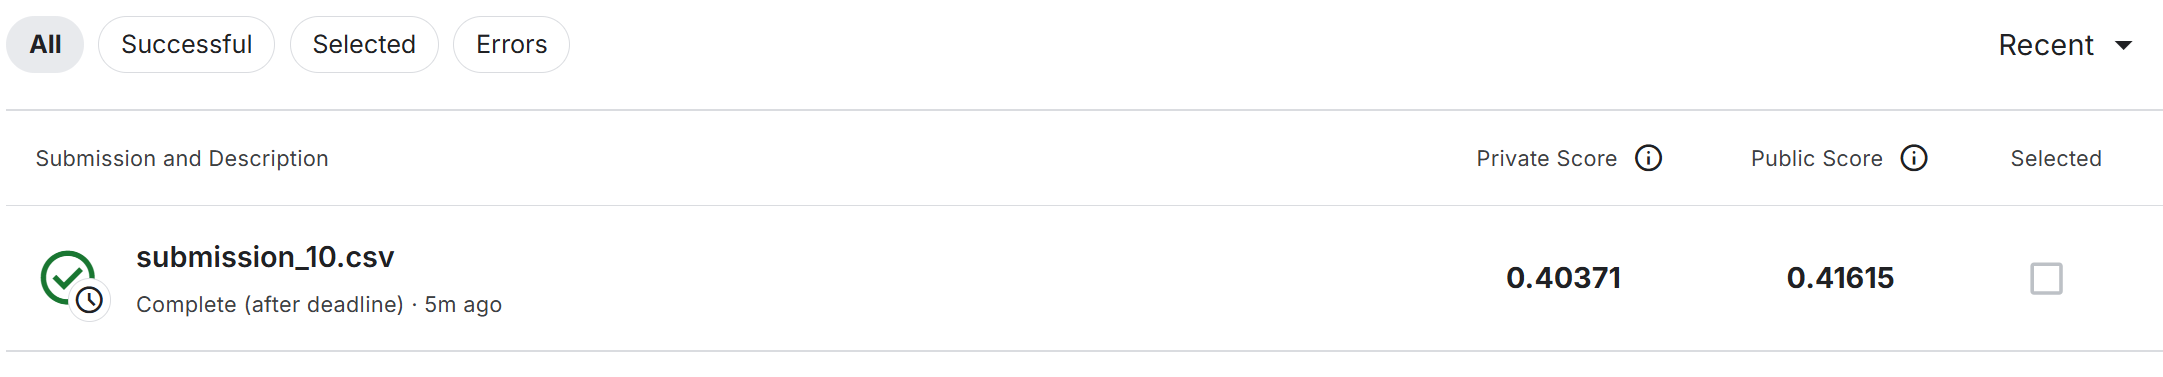

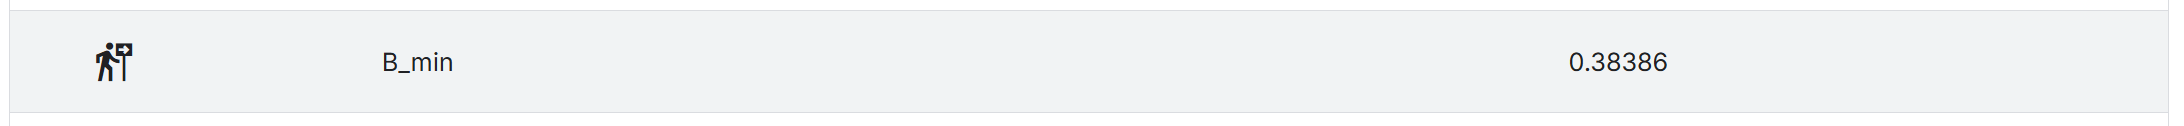

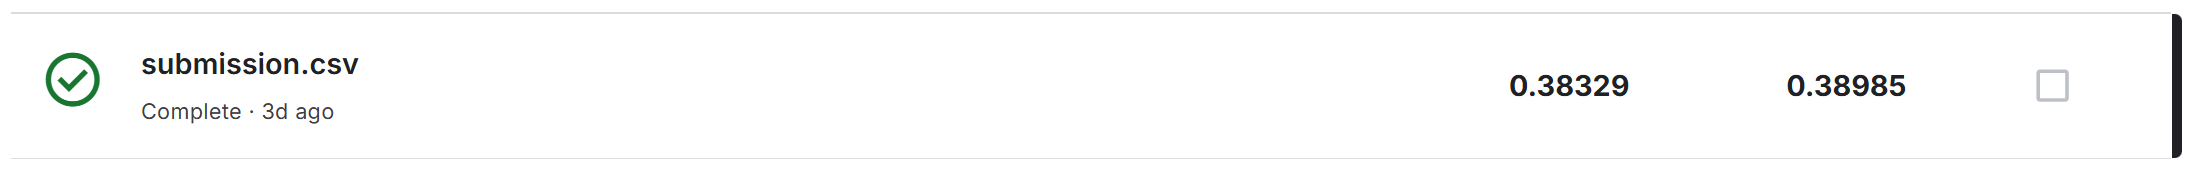

## Улучшения baseline'а (дополнительные баллы)

Дальше начинается про "улучшение и осмысленность". Здесь вы можете получить дополнительные баллы за продуманные эксперименты.

### 1. Углублённый EDA по текстам (чтобы понимать, какие фичи вообще нужны)

Перед тем как изобретать признаки, полезно чуть глубже посмотреть на тексты. Возможные направления:

- распределения длины:
  - заголовков,
  - текстов,
  - объединённых текстов;
- сравнение этих распределений по классам;
- частотные слова/фразы для разных классов:
  - какие токены чаще встречаются в `relevant_plus`,
  - какие - в `no_relevant`;
- проверка доли пар с одинаковыми авторами в разных классах;
- среднее/типичное количество общих слов между текстами пары по каждому классу.

Не нужно превращать это в отдельный научный отчёт,  
но 2–3 осмысленных наблюдения, которые потом перейдут в фичи, - это очень хорошо.

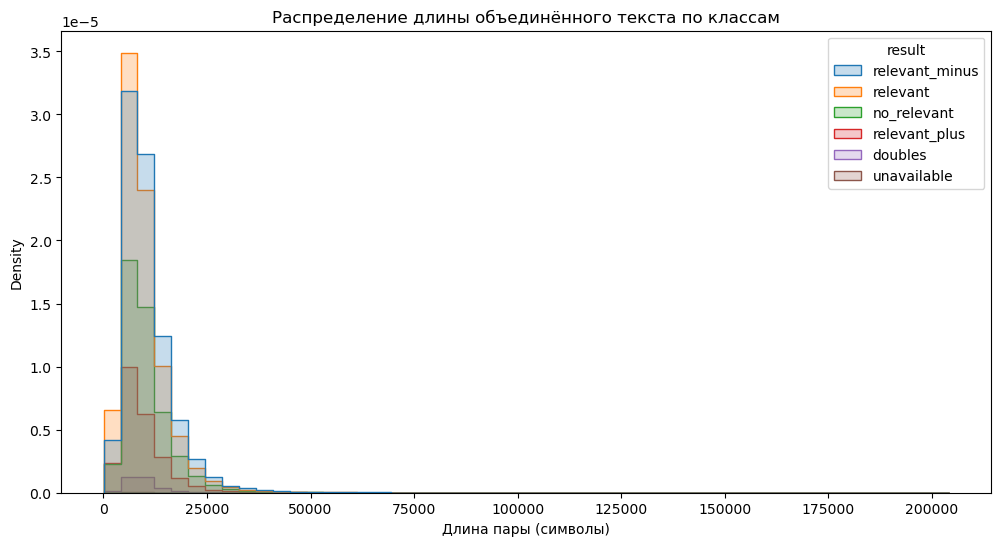

In [35]:
# углублённый EDA
# your code here ┌(ಠ_ಠ)┘

# распределение длины текстов

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

train_df["len_title_left"] = train_df["title_left"].str.len()
train_df["len_title_right"] = train_df["title_right"].str.len()
train_df["len_text_left"] = train_df["full_text_left"].str.len()
train_df["len_text_right"] = train_df["full_text_right"].str.len()
train_df["len_pair_text"] = train_df["pair_text"].str.len()

test_df["len_title_left"] = test_df["title_left"].str.len()
test_df["len_title_right"] = test_df["title_right"].str.len()
test_df["len_text_left"] = test_df["full_text_left"].str.len()
test_df["len_text_right"] = test_df["full_text_right"].str.len()
test_df["len_pair_text"] = test_df["pair_text"].str.len()

plt.figure(figsize=(12,6))
sns.histplot(train_df, x="len_pair_text", hue="result", bins=50, element="step", stat="density")
plt.title("Распределение длины объединённого текста по классам")
plt.xlabel("Длина пары (символы)")
plt.show()

In [36]:
train_df["same_author"] = train_df["author_left"] == train_df["author_right"]

test_df["same_author"] = test_df["author_left"] == test_df["author_right"]

author_ratio = train_df.groupby("result")["same_author"].mean()
print("Доля пар с одинаковыми авторами по классам:\n", author_ratio)

Доля пар с одинаковыми авторами по классам:
 result
doubles           0.972944
no_relevant       0.254879
relevant          0.254514
relevant_minus    0.238524
relevant_plus     0.396610
unavailable       0.066667
Name: same_author, dtype: float64


```
Класс doubles почти полностью состоит из пар с одинаковыми авторами (97%).
Это логично: дубликаты чаще всего принадлежат одному автору.
Признак same_author очень информативен для выявления дубликатов.

Для остальных классов доля совпадения авторов значительно ниже:
no_relevant, relevant, relevant_minus = 24–25%
relevant_plus = 39%
unavailable = 7%

Это говорит о том, что одинаковый автор не гарантирует релевантность,
но наличие одного и того же автора слегка повышает вероятность, что тексты связаны.

Класс relevant_plus выделяется с долей совпадения авторов почти 40%, что может указывать на то,
что сильная релевантность чаще встречается среди постов одного автора.
```

In [37]:
def common_words_ratio(row):
    left_tokens = set(row["full_text_left"].split())
    right_tokens = set(row["full_text_right"].split())
    if len(left_tokens)==0 or len(right_tokens)==0:
        return 0
    return len(left_tokens & right_tokens) / len(left_tokens | right_tokens)

train_df["common_words_ratio"] = train_df.apply(common_words_ratio, axis=1)

# среднее по классам
common_ratio_mean = train_df.groupby("result")["common_words_ratio"].mean()
print("Среднее % общих слов между текстами по классам:\n", common_ratio_mean)

Среднее % общих слов между текстами по классам:
 result
doubles           0.933079
no_relevant       0.061196
relevant          0.078764
relevant_minus    0.070423
relevant_plus     0.115039
unavailable       0.066139
Name: common_words_ratio, dtype: float64


```
Класс doubles резко выделяется: средняя доля общих слов 97%,
что указывает на дубликаты или почти идентичные тексты.
```

In [38]:
test_df["common_words_ratio"] = train_df.apply(common_words_ratio, axis=1)

In [39]:
from collections import Counter

def get_top_tokens(df, col, top_n=10):
    all_tokens = " ".join(df[col]).split()
    return Counter(all_tokens).most_common(top_n)

print("Топ токены для relevant_plus:")
print(get_top_tokens(train_df[train_df["result"]=="relevant_plus"], "pair_text"))

print("\nТоп токены для no_relevant:")
print(get_top_tokens(train_df[train_df["result"]=="no_relevant"], "pair_text"))

Топ токены для relevant_plus:
[('и', 896267), ('в', 748178), ('на', 452408), ('не', 447832), ('с', 313165), ('что', 265469), ('-', 255064), ('а', 133483), ('из', 131831), ('как', 131631)]

Топ токены для no_relevant:
[('и', 1909216), ('в', 1742793), ('не', 1046755), ('на', 978721), ('с', 663454), ('что', 656999), ('-', 463176), ('а', 307146), ('как', 305051), ('—', 293661)]


```
Топ токены почти полностью состоят из стоп-слов (и, в, на, не, с, что, а, как).
Это значит, что частотные слова сами по себе не дают сильного различительного сигнала между классами.

Сравнение relevant_plus и no_relevant:
Порядок и частота токенов схожи — это логично, так как это обычные предлоги, союзы и частицы.
Практически нет специфических слов, которые встречаются только в релевантных или нерелевантных текстах.

Вывод:
Если использовать топ токены для создания новых признаков, нужно фильтровать стоп-слова.
```

In [40]:
# проделаем то же, только с исключением стопслов
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Загрузка стоп‑слов
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [42]:
def get_top_tokens(df, col, top_n=10, remove_stopwords=True):
    all_text = " ".join(df[col])
    tokens = all_text.split()
    tokens = [token.lower().strip('.,!?";:()[]{}') for token in tokens]

    if remove_stopwords:
        tokens = [token for token in tokens if token not in russian_stopwords and token.isalpha()]

    return Counter(tokens).most_common(top_n)

print("Топ токены для relevant_plus (без стоп‑слов):")
print(get_top_tokens(train_df[train_df["result"]=="relevant_plus"], "pair_text"))

print("\nТоп токены для no_relevant (без стоп‑слов):")
print(get_top_tokens(train_df[train_df["result"]=="no_relevant"], "pair_text"))

Топ токены для relevant_plus (без стоп‑слов):
[('это', 167166), ('очень', 61102), ('время', 42488), ('которые', 42023), ('просто', 36810), ('нужно', 33253), ('года', 33152), ('также', 33052), ('лет', 30812), ('который', 30531)]

Топ токены для no_relevant (без стоп‑слов):
[('это', 369777), ('очень', 118622), ('время', 95882), ('лет', 89604), ('года', 86809), ('которые', 83502), ('просто', 80760), ('году', 75905), ('всё', 74931), ('который', 67372)]


```
Большое пересечение токенов между классами:
Многие слова повторяются в обоих списках (это, очень, время, которые, лет, года, который).
Это говорит о том, что частотные слова сами по себе мало различают relevant_plus и no_relevant.
```


#### 2. Улучшения моделей и признаков

Нужно реализовать минимум два осмысленных улучшения относительно baseline.  
Это могут быть:

- Более выразительные текстовые представления:
  - n-граммы большей длины,
  - раздельные векторы для левой и правой части с последующей склейкой,
  - эмбеддинги предложений (Sentence-BERT, RuBERT и т.п.).

- Ручные фичи, вдохновлённые EDA:
  - длины текстов, разницы длин,
  - доля общих слов,
  - индикаторы вроде совпадения авторов,
  - другие простые числовые признаки.

- NER (Named Entity Recognition) - особенно приветствуется:
  - извлечь сущности из текстов,
  - посчитать пересечение по сущностям для пары,
  - добавить это как признаки и посмотреть, влияет ли на F1.

- Трансформеры (по желанию):
  - BERT / другая модель как cross-encoder для пары текстов,
  - сравнение "только заголовки" vs "заголовки + тексты",
  - обсуждение влияния длины контекста.

Важно: здесь нет цели перебрать всё подряд. Нам интересно увидеть, что вы:
- опираетесь на EDA при выборе фич,
- пробуете хотя бы пару разных направлений,
- сравниваете их по той же самой валидации, что и baseline.

>


In [ ]:
# эксперименты с улучшенными признаками / моделями
# your code here ٩(⁎❛ᴗ❛⁎)۶

##### Вариан_2: Базовый + биграммы

In [48]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5_000, # уменьшим словарь, чтобы хватило памяти
    min_df=3,
    max_df=0.3,
    stop_words=RUS_STOPWORDS,
    sublinear_tf=True,
    lowercase=True,
    dtype=np.float32
)

In [49]:
X = train_df["pair_text"]
y = train_df["result"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [50]:
X_train_vec = tfidf.fit_transform(X_train) # на моем компьютере обрабатывает вечность (около 1 ч)

In [51]:
X_val_vec = tfidf.transform(X_val) 

In [52]:
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [53]:
y_val_pred = model.predict(X_val_vec)

f1_2 = f1_score(y_val, y_val_pred, average="weighted")
print("Weighted F1 on validation:", f1_2)

Weighted F1 on validation: 0.40085001948350946


```
Увеличение n-грамм не дали прироста F1 на валидации
```

##### Вариант_3 - Обработка текста + использование числовых признаков:
 длина текста, коэф.сходства, % общих слов

In [54]:
import re

def extract_pseudo_ents(text):
    if not isinstance(text, str):
        return set()
    
    # слова с заглавной буквы
    ents = re.findall(r'\b[А-ЯЁ][а-яё]{2,}\b', text)
    return set(e.lower() for e in ents)

In [55]:
def pseudo_ner_overlap(text_left, text_right):
    ents_left = extract_pseudo_ents(text_left)
    ents_right = extract_pseudo_ents(text_right)

    if not ents_left or not ents_right:
        return 0.0

    return len(ents_left & ents_right) / len(ents_left | ents_right)

In [56]:
def ner_overlap_ratio(text_left, text_right):
    ents_left = extract_pseudo_ents(text_left)
    ents_right = extract_pseudo_ents(text_right)
    
    if not ents_left or not ents_right:
        return 0.0
    
    return len(ents_left & ents_right) / len(ents_left | ents_right)

In [57]:
train_df['ner_overlap'] = train_df.apply(
    lambda row: ner_overlap_ratio(
        row['title_left'],   # только заголовки
        row['title_right']
    ),
    axis=1
)

In [58]:
X = train_df.drop(columns=["result"])
y = train_df["result"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [59]:
X_train_text = X_train["pair_text"]

In [60]:
X_val_text = X_val["pair_text"]

In [61]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 1),
    max_features=50_000,
    min_df=5,
    max_df=0.3,
    stop_words=RUS_STOPWORDS,
    sublinear_tf=True,
    lowercase=True,
    dtype=np.float32
)

In [62]:
X_train_text_vec = tfidf.fit_transform(X_train_text)

In [64]:
X_val_text_vec = tfidf.transform(X_val_text)

In [188]:
from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# числовые признаки
num_features = ["same_author", "common_words_ratio", "len_text_left", "len_text_right", "ner_overlap"]

In [181]:
# Для train
X_train_manual = X_train[num_features].fillna(0).astype(np.float32)
X_train_manual_sparse = csr_matrix(X_train_manual.values)

In [182]:
# Для валидации
X_val_manual = X_val[num_features].fillna(0).astype(np.float32)
X_val_manual_sparse = csr_matrix(X_val_manual.values)

In [183]:
# Объединяем с TF-IDF
X_train_final = hstack([X_train_text_vec, X_train_manual_sparse])
X_val_final = hstack([X_val_text_vec, X_val_manual_sparse])

In [184]:
# обучение
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

In [185]:
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [187]:
# качество на валидации
y_val_pred = model.predict(X_val_final)
f1_3 = f1_score(y_val, y_val_pred, average="weighted")
print("Weighted F1 на валидации:", f1_3)

Weighted F1 на валидации: 0.300185461263571


```
Обработка текста и добавление числовых признаков дало меньший скор
```

##### Вариант_4: обработка отдельно заголовков и текста, отдельно правой и левой части. 
 Числовые признаки не используем

In [73]:
X = train_df
y = train_df["result"]

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [74]:
tfidf_title = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20_000,
    min_df=3,
    max_df=0.3,
    stop_words=RUS_STOPWORDS,
    sublinear_tf=True
)

tfidf_text = TfidfVectorizer(
    ngram_range=(1, 1),
    max_features=50_000,
    min_df=3,
    max_df=0.3,
    stop_words=RUS_STOPWORDS,
    sublinear_tf=True
)

In [94]:
X_train_title_left = tfidf_title.fit_transform(
    X_train["title_left"].fillna("")
)
X_val_title_left = tfidf_title.transform(
    X_val["title_left"].fillna("")
)

In [76]:
X_train_title_right = tfidf_title.transform(
    X_train["title_right"].fillna("")
)
X_val_title_right = tfidf_title.transform(
    X_val["title_right"].fillna("")
)

In [77]:
X_train_text_left = tfidf_text.fit_transform(
    X_train["full_text_left"].str.slice(0, 3000).fillna("") # обрезаю длину текста в ограниченных ресурсах компьютера
)
X_val_text_left = tfidf_text.transform(
    X_val["full_text_left"].str.slice(0, 3000).fillna("")
)

In [78]:
X_train_text_right = tfidf_text.transform(
    X_train["full_text_right"].str.slice(0, 3000).fillna("")
)
X_val_text_right = tfidf_text.transform(
    X_val["full_text_right"].str.slice(0, 3000).fillna("")
)

In [79]:
from scipy.sparse import hstack

X_train_diff = abs(X_train_text_left - X_train_text_right)
X_val_diff = abs(X_val_text_left - X_val_text_right)

In [80]:
X_train_final = hstack([
    X_train_title_left,
    X_train_title_right,
    X_train_diff
])


In [81]:
X_val_final = hstack([
    X_val_title_left,
    X_val_title_right,
    X_val_diff
])

In [82]:
from sklearn.linear_model import LogisticRegression

model_lr_sep = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    class_weight="balanced"
)

model_lr_sep.fit(X_train_final, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [83]:
y_val_pred = model_lr_sep.predict(X_val_final)

f1_4 = f1_score(y_val, y_val_pred, average="weighted")
print("Weighted F1:", f1_4)

Weighted F1: 0.417780565232641


In [95]:
X_test_title_left = tfidf_title.transform(
    test_df["title_left"].fillna("")
)

In [97]:
X_test_title_right = tfidf_title.transform(
    test_df["title_right"].fillna("")
)

In [98]:
X_test_text_left = tfidf_text.transform(
    test_df["full_text_left"].str.slice(0, 3000).fillna("")
)

In [99]:
X_test_text_right = tfidf_text.transform(
    test_df["full_text_right"].str.slice(0, 3000).fillna("")
)

In [100]:
X_test_diff = abs(X_test_text_left - X_test_text_right)

In [101]:
X_test_final = hstack([
    X_test_title_left,
    X_test_title_right,
    X_test_diff
])

In [102]:
y_test_pred = model_lr_sep.predict(X_test_final)

submission = pd.DataFrame({
    "pairId": test_df["pairId"],
    "result": y_test_pred
})

In [103]:
submission.to_csv("submission_11.csv", index=False)
print("Submission saved!")

Submission saved!


In [104]:
submission.head(2)

,pairId,result
0,15923600479346774213_10591191871885021601,relevant_minus
1,7866768712250438268_9584895322191308561,relevant


```
Небольшой прирост F1 на валидации, но не на частной выборке,
возмжно из-за сокращения длины текста для возможности быстрой обработки в ограниченных ресурсах компьютера.
Текст обрабатывается частями (правая и левая), поэтому процесс более дробный и кажется быстрее. 
```

##### Вариант_5: Применение Наташи + базовый вариант + числовые признаки

In [85]:
!pip install natasha

In [86]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsNERTagger,
    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)


In [107]:
def extract_ents(text):
    if not isinstance(text, str) or len(text) < 5:
        return set()

    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)

    ents = set()
    for span in doc.spans:
        span.normalize(morph_vocab)
        ents.add(span.normal)

    return ents

In [87]:
# коэффициент сходства
def ner_pair_features(text_left, text_right):
    ents_l = extract_ents(text_left)
    ents_r = extract_ents(text_right)

    if not ents_l or not ents_r:
        return 0.0, 0, len(ents_l | ents_r)

    intersection = ents_l & ents_r
    union = ents_l | ents_r

    overlap = len(intersection) / len(union) if union else 0.0

    return overlap, len(intersection), len(union)

In [89]:
def extract_ner_set(text):
    if not isinstance(text, str) or not text.strip():
        return set()
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)
    return {span.text.lower() for span in doc.spans}

In [90]:
from tqdm import tqdm
tqdm.pandas()

In [91]:
train_df["ner_left"] = train_df["title_left"].progress_apply(extract_ner_set)
train_df["ner_right"] = train_df["title_right"].progress_apply(extract_ner_set)

100%|██████████| 211393/211393 [19:17<00:00, 182.64it/s]


In [117]:
test_df["ner_right"] = test_df["title_right"].progress_apply(extract_ner_set)

100%|██████████| 51636/51636 [05:29<00:00, 156.66it/s] 


In [120]:
test_df["ner_left"] = test_df["title_left"].progress_apply(extract_ner_set)

100%|██████████| 51636/51636 [04:47<00:00, 179.72it/s]


In [108]:
train_df[[
    "ner_overlap",
    "ner_intersection",
    "ner_union"
]] = [
    ner_pair_features(l, r)
    for l, r in zip(train_df["ner_left"], train_df["ner_right"])
]

In [121]:
test_df[[
    "ner_overlap",
    "ner_intersection",
    "ner_union"
]] = [
    ner_pair_features(l, r)
    for l, r in zip(test_df["ner_left"], test_df["ner_right"])
]

In [109]:
X = train_df
y = train_df["result"]

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(
    ngram_range=(1, 1),
    max_features=50_000,
    min_df=5,
    stop_words=RUS_STOPWORDS,
    sublinear_tf=True,
    lowercase=True,
    dtype=np.float32
)

X_train_vec = tfidf.fit_transform(X_train["pair_text"])
X_val_vec = tfidf.transform(X_val["pair_text"])

In [111]:
X_test_vec = tfidf.transform(test_df["pair_text"])

In [146]:
num_cols = [
    "ner_overlap",
    "ner_intersection",
    "ner_union",
    "common_words_ratio"
]

X_train_num = X_train[num_cols].fillna(0).astype(np.float32).values
X_val_num = X_val[num_cols].fillna(0).astype(np.float32).values

In [122]:
X_test_num = test_df[num_cols].fillna(0).astype(np.float32).values

In [113]:
X_train_final = hstack([X_train_vec, X_train_num])
X_val_final = hstack([X_val_vec, X_val_num])

In [123]:
X_test_final = hstack([X_test_vec, X_test_num])

In [114]:
from sklearn.linear_model import LogisticRegression

model_lr_natasha = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model_lr_natasha.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [115]:
y_val_pred = model_lr_natasha.predict(X_val_final)

f1_5 = f1_score(y_val, y_val_pred, average="weighted")
print("Weighted F1:", f1_5)

Weighted F1: 0.43964481871590233


In [124]:
y_test_pred = model_lr_natasha.predict(X_test_final)

submission = pd.DataFrame({
    "pairId": test_df["pairId"],
    "result": y_test_pred
})

In [125]:
submission.to_csv("submission_12.csv", index=False)
print("Submission saved!")

Submission saved!


```
Метод дал хороший F1 на валидации, но низкий Private Score (0.39 - выше минимального порога, но ниже базового метода_1 ) 
На приватной выборке скор меньше базового
```

##### Вариант_6: SVD на правой и левой части + CatBoost

```
Использую SVD, иначе CatBoost падает на компьютере
```

In [130]:
!pip install catboost

In [ ]:
X = train_df.drop(columns=["result"])
y = train_df["result"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
tfidf_title = TfidfVectorizer(
    ngram_range=(1, 1),
    max_features=20_000,
    min_df=3,
    max_df=0.3,
    stop_words=RUS_STOPWORDS,
    lowercase=True,
    dtype=np.float32
)

tfidf_text = TfidfVectorizer(
    ngram_range=(1, 1),
    max_features=30_000,
    min_df=5,
    max_df=0.5,
    stop_words=RUS_STOPWORDS,
    lowercase=True,
    sublinear_tf=True,
    dtype=np.float32
)

In [ ]:
X_train_title_left  = tfidf_title.fit_transform(X_train["title_left"].fillna(""))
X_val_title_left    = tfidf_title.transform(X_val["title_left"].fillna(""))

X_train_title_right = tfidf_title.fit_transform(X_train["title_right"].fillna(""))
X_val_title_right   = tfidf_title.transform(X_val["title_right"].fillna(""))

In [ ]:
X_test_title_left  = tfidf_title.fit_transform(test_df["title_left"].fillna(""))

X_test_title_right = tfidf_title.fit_transform(test_df["title_right"].fillna(""))

In [ ]:
X_train_text_left  = tfidf_text.fit_transform(X_train["full_text_left"].fillna(""))
X_val_text_left    = tfidf_text.transform(X_val["full_text_left"].fillna(""))

In [ ]:
X_test_text_left  = tfidf_text.fit_transform(test_df["full_text_left"].fillna(""))

In [ ]:
X_train_text_right = tfidf_text.fit_transform(X_train["full_text_right"].fillna(""))
X_val_text_right   = tfidf_text.transform(X_val["full_text_right"].fillna(""))

In [ ]:
X_test_text_right = tfidf_text.fit_transform(test_df["full_text_right"].fillna(""))

In [152]:
from sklearn.decomposition import TruncatedSVD

In [153]:
svd = TruncatedSVD(n_components=300, random_state=42)

X_train_title_left_svd  = svd.fit_transform(X_train_title_left)
X_val_title_left_svd = svd.transform(X_val_title_left)
X_train_title_right_svd  = svd.fit_transform(X_train_title_right)
X_val_title_right_svd = svd.transform(X_val_title_right)
X_train_text_left_svd  = svd.fit_transform(X_train_text_left)
X_val_text_left_svd = svd.transform(X_val_text_left)
X_train_text_right_svd  = svd.fit_transform(X_train_text_right)
X_val_text_right_svd = svd.transform(X_val_text_right)

In [154]:
X_test_title_left_svd  = svd.fit_transform(X_test_title_left)
X_test_title_right_svd  = svd.fit_transform(X_test_title_right)
X_test_text_left_svd  = svd.fit_transform(X_test_text_left)
X_test_text_right_svd  = svd.fit_transform(X_test_text_right)

In [155]:
from scipy.sparse import hstack

In [156]:
X_train_text_all = np.hstack([
    X_train_title_left_svd,
    X_train_title_right_svd,
    X_train_text_left_svd,
    X_train_text_right_svd
])

X_val_text_all = np.hstack([
    X_val_title_left_svd,
    X_val_title_right_svd,
    X_val_text_left_svd,
    X_val_text_right_svd
])

In [157]:
X_test_text_all = np.hstack([
    X_test_title_left_svd,
    X_test_title_right_svd,
    X_test_text_left_svd,
    X_test_text_right_svd
])

In [158]:
X_train_diff = abs(X_train_text_left_svd - X_train_text_right_svd)
X_val_diff   = abs(X_val_text_left_svd - X_val_text_right_svd)

In [159]:
X_test_diff = abs(X_test_text_left_svd - X_test_text_right_svd)

In [161]:
manual_cols = [
    'same_author',
    'common_words_ratio',
    'ner_overlap'
]

In [162]:
from scipy.sparse import csr_matrix

X_train_manual = csr_matrix(
    X_train[manual_cols]
    .fillna(0)
    .astype(np.float32)
    .values
)

X_val_manual = csr_matrix(
    X_val[manual_cols]
    .fillna(0)
    .astype(np.float32)
    .values
)

In [163]:
X_test_manual = csr_matrix(
    test_df[manual_cols]
    .fillna(0)
    .astype(np.float32)
    .values
)

In [164]:
X_train_final = hstack([
    X_train_text_left_svd,
    X_train_text_right_svd,
    X_train_diff,
    X_train_manual
])

In [165]:
X_test_final = hstack([
    X_test_text_left_svd,
    X_test_text_right_svd,
    X_test_diff,
    X_test_manual
])

In [166]:
X_val_final = hstack([
    X_val_text_left_svd,
    X_val_text_right_svd,
    X_val_diff,
    X_val_manual
])

In [169]:
from catboost import CatBoostClassifier

model_cb = CatBoostClassifier(
    loss_function="MultiClass",
    iterations=500,
    depth=6,
    learning_rate=0.1,
    eval_metric="TotalF1",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=100
)

In [170]:
model_cb.fit(
    X_train_final,
    y_train,
    eval_set=(X_val_final, y_val),
    use_best_model=True
)

0:	learn: 0.3042507	test: 0.2708278	best: 0.2708278 (0)	total: 1.12s	remaining: 9m 18s
100:	learn: 0.6098050	test: 0.4258548	best: 0.4351203 (74)	total: 2m 16s	remaining: 8m 59s
200:	learn: 0.6328903	test: 0.4414743	best: 0.4415426 (198)	total: 4m 30s	remaining: 6m 42s
300:	learn: 0.6463133	test: 0.4474399	best: 0.4474399 (300)	total: 6m 35s	remaining: 4m 21s
400:	learn: 0.6577465	test: 0.4504472	best: 0.4505711 (393)	total: 8m 43s	remaining: 2m 9s
499:	learn: 0.6671776	test: 0.4528616	best: 0.4528616 (499)	total: 10m 54s	remaining: 0us

bestTest = 0.4528616267
bestIteration = 499



In [171]:
from sklearn.metrics import f1_score

y_val_pred = model_cb.predict(X_val_final)
y_val_pred = y_val_pred.squeeze()

f1_6 = f1_score(y_val, y_val_pred, average="weighted")
print("Weighted F1:", f1_6)

Weighted F1: 0.430873531487549


In [176]:
y_test_pred = model_cb.predict(X_test_final)
y_test_pred = y_test_pred.squeeze()

In [177]:
submission = pd.DataFrame({
    "pairId": test_df["pairId"],
    "result": y_test_pred
})

In [179]:
submission.to_csv("submission_13.csv", index=False)
print("Submission saved!")

Submission saved!


```
Метод дал F1 хороший на валидации, но очень низкий на тесте (0.32).
Возможно из-за того, что SVD "съел" часть информации и catboost хуже работает с текстами.
```

#### 3. Таблица экспериментов и выводы

В конце экспериментов полезно аккуратно собрать результаты.

Рекомендуется:

1. Выбрать несколько конфигураций (baseline + улучшения, 3–5 вариантов).
2. Для каждой записать:
   - краткое описание (какие фичи и модель),
   - Weighted F1 на валидации.
3. Оформить это в виде таблицы (пример):

| Модель / фичи                     | Weighted F1 (val) |
|-----------------------------------|-------------------|
| метод 1     | 0.XX              |
| метод 2          | 0.XX              |
| метод 3    | 0.XX              |
| метод 4    | 0.XX              |
| метод 5 | 0.XX              |

**Сводная таблица результатов**

|№	 |Модель / фичи	|F1 (val) | Private Score |Public Score|
|----|--------------|------------------|---------------|------------|
|Метод 1 |(Baseline) - TF-IDF (unigrams) на склеенной паре текстов (left + right) + LogisticRegression	|0.41459|**0.40371**|**0.41615**|
|Метод 2	|TF-IDF (bigrams) на склеенной паре текстов + LogisticRegression	|0.40085|0.40046|0.39923|
|Метод 3	|TF-IDF (unigrams) + числовые признаки (длины текстов, коэффициент сходства, % общих слов) + LogisticRegression	|0.30019|-|-|
|Метод 4	|Раздельная обработка: TF-IDF (unigrams) отдельно для заголовков и текста, отдельно для left/right + LogisticRegression	|0.41778|-|-|
|Метод 5	|Метод 1 + NER (Natasha): ner_overlap, ner_intersection, ner_union + LogisticRegression	|0.43964|0.38769|0.39211|
|Метод 6	|TF-IDF - SVD (left/right отдельно) + CatBoost	|0.43087|0.32278|0.32002|

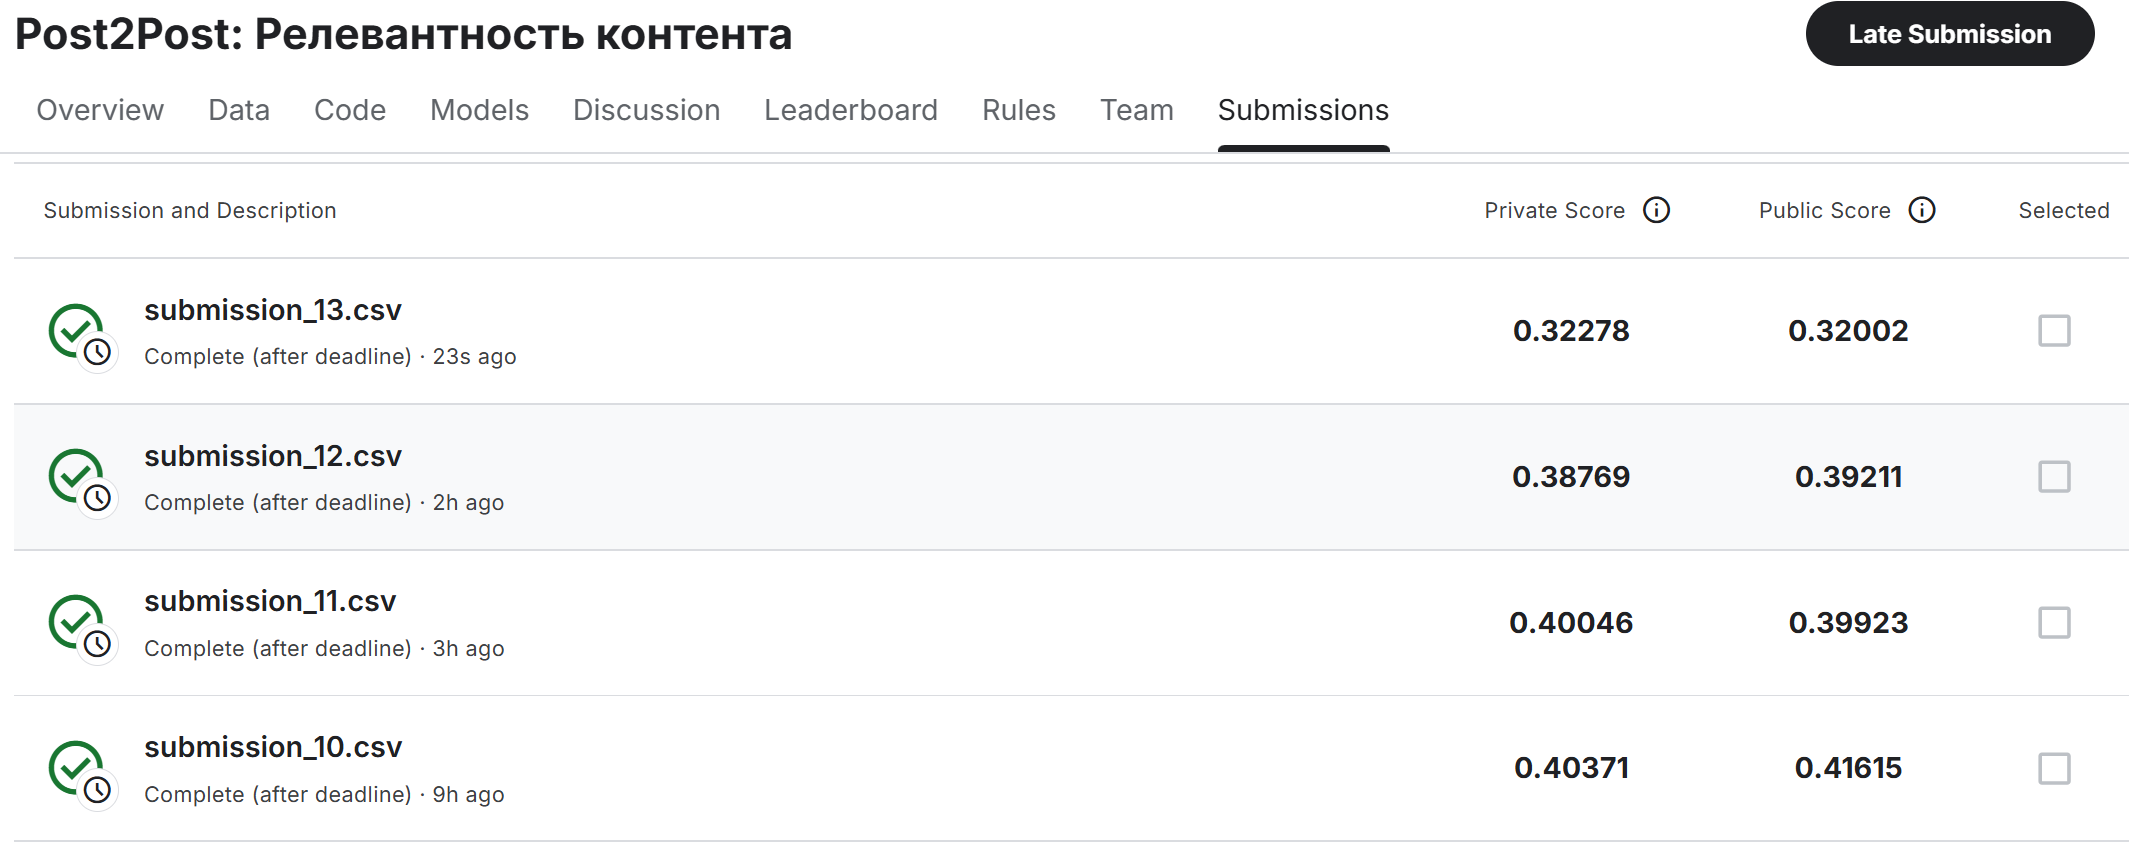

**выводы по методам:**

--------

**1. Метод 1 — Baseline**

TF-IDF (unigrams) + LogisticRegression

  - Простая и эффективная модель
  - Ловит лексическое сходство
  - Быстро обучается
  - Хороший скор

Вывод:
TF-IDF + линейная модель - сильный baseline для задач сравнения текстов. Хороший скор, приемлемое время обучения.

**Среди рассмотренных вариантов эта модель показала себя лучше всего.**

- Базовая локаничная обработка текста,
- сравнительно быстрое обучение,
- лучший Private Score

-------

**2. Метод 2 — Биграммы ухудшили результат**

- Биграммы увеличили размерность и скорость обработки (больше 1 ч на тект)!
- F1 снизился

Вывод:
Для новостных текстов биграммы работают хуже.

-------

**3. Метод 3 — Числовые признаки**

Числовые признаки: Длины текстов, % общих слов, Простые коэффициенты сходства.

- Низкий F1
- признаки слабо коррелируют с таргетом и имеют другой масштаб, поэтому линейная модель не может их правильно взвесить

Вывод:
Числовые признаки мешают TF-IDF.

------

**4. Метод 4 — Раздельная обработка**

- Разделение заголовков и текста
- Разделение left / right
- Модель учится сравнению

Небольшой прирост F1

Вывод: Структура данных важна - не всё нужно склеивать.

------

**5. Метод 5 — Natasha + NER**

- NER добавляет семантический сигнал
- Совпадение сущностей = высокая релевантность
- Дополняет TF-IDF

Хороший F1 = 0.4396 на валидации, но низкий Private Score (**выше минимального порога, но ниже базового метода_1**).

Вероятной причиной является шум в автоматическом извлечении сущностей и различие распределений между обучающей и тестовой выборками

Вывод:
NER — полезный дополнительный источник информации в задаче. Однако, требует более аккуратной интеграции или ансамблирования с нейронными моделями для стабильного обобщения

------

**6. Метод 6 — SVD + CatBoost**

- SVD уменьшает размерность (для ускорения обучения)
- CatBoost умеет работать с нелинейностями
- Хорошо комбинирует признаки

Немного хуже, чем метод 5, т.к. SVD теряет часть информации

CatBoost хуже работает с текстовыми латентными признаками, чем линейные модели. 

Возможно модель переобучилась.

**На частной выборке дал самый плохой результат (ниже базового минимума)!**

Вывод:
CatBoost норм, но линейные модели + богатые текстовые фичи эффективнее.

-----

**ОБЩИЙ ВЫВОД:**

что сработало:

- TF-IDF (unigrams)

- раздельная обработка left/right

- NER (Natasha)

- LogisticRegression

Что не сработало:

- биграммы

- простые числовые признаки


Если бы позволяли мощности на компьютере , а следовательно и время, можно было бы попробовать RuBERT embeddings + cosine / MLP: 

каждый текст (левый и правый пост) кодируется с помощью предобученной языковой модели RuBERT, которая формирует семантические эмбеддинги. Далее релевантность пары может оцениваться либо через cosine similarity между эмбеддингами, либо путём подачи конкатенации эмбеддингов в MLP-классификатор.

-----

## Воспроизводимый пайплайн (обязательный блок, если вы участовали в соревновании)

В этом разделе добавьте, пожалуйста, одну аккуратную кодовую ячейку, в которой собран **целостный пайплайн** для получения финального `submission.csv`.

Эта ячейка должна:

1. Загрузить данные
   - либо повторно считать `items.parquet`, `train.csv`, `test.csv`,  
   - либо опираться на уже загруженные выше переменные (но без ручного редактирования кода).

2. Подготовить признаки
   - собрать тексты пар в том виде, в котором они используются вашей финальной моделью;  
   - при необходимости - достроить дополнительные фичи.

3. Создать и загрузить финальную модель
   - либо обучить её (если обучение занимает разумное время в Colab/Kaggle),  
   - либо загрузить заранее обученные веса:
     - из локального файла,
     - или по ссылке (Google Drive / Kaggle Datasets и т.д.).

4. Выполнить инференс на test
   - получить предсказания классов для всех строк `test.csv`.

5. Сформировать `submission.csv` в формате соревнования:
   - две колонки: `pairId`, `result`,
   - `pairId` - как в исходном `test.csv`,
   - `result` - одна из 4 меток: `relevant_plus`, `relevant`, `relevant_minus`, `no_relevant`.

**Требование:**  

если ассистент запустит только эту ячейку (при условии, что все необходимые функции/классы определены выше), на выходе должен появиться корректный `submission.csv`, соответствующий вашему финальному сабмиту на Kaggle.

Если ваша финальная модель обучалась долго (например, трансформер):

- обучите её один раз заранее;
- сохраните веса в файл и выложите в доступное место;
- в этой ячейке загрузите готовые веса, а не переобучайте модель с нуля;
- кратко укажите в комментарии, откуда берутся веса (ссылка/путь).

In [ ]:
# Воспроизводимый пайплайн: формирование финального submission.csv
# TODO: заполните эту ячейку так, чтобы при запуске она:
#  1) подготовила данные и признаки
#  2) загрузила/создала вашу финальную модель
#  3) посчитала предсказания на test
#  4) сохранила submission.csv в нужном формате

# your code here (⌐■_■)

'''pip install -q gdown
import gdown

FILE_ID = "1UgcqH8JOR8h_s6vQO_tmrsr_3KKRKqru"
OUTPUT_NAME = "items.parquet"
gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)

FILE_ID = "1S4koPORSyiSkAeWowu8RZoWVRFx3GBCU"
OUTPUT_NAME = "train.csv" 
gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)

FILE_ID = "1M_k5jHHZtjixNrjeiKQJ1c4TFAfFpGQP"  
OUTPUT_NAME = "test.csv"
gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)

FILE_ID = "16sm_GhCPVOCb_zg-A_Wud1r1zcvXaHue"
OUTPUT_NAME = "sample_submission.csv"
gdown.download(id=FILE_ID, output=OUTPUT_NAME, quiet=False)
'''

import pandas as pd

items = pd.read_parquet("items.parquet")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Объединяем title + content
items["title"] = items["title"].fillna("")
items["content"] = items["content"].fillna("")
items["full_text"] = items["title"] + ". " + items["content"]

# Для левого поста
train = train.merge(
    items[["itemId", "full_text"]],
    left_on="leftItemId",
    right_on="itemId",
    how="left"
).rename(columns={"full_text": "text_left"}).drop(columns=["itemId"])

# Для правого поста
train = train.merge(
    items[["itemId", "full_text"]],
    left_on="rightItemId",
    right_on="itemId",
    how="left"
).rename(columns={"full_text": "text_right"}).drop(columns=["itemId"])

# для train
# Левый пост
train_df = train.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="leftItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_left",
    "content": "content_left",
    "full_text": "full_text_left",
    "authorId": "author_left"
}).drop(columns=["itemId"])

# Правый пост
train_df = train_df.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="rightItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_right",
    "content": "content_right",
    "full_text": "full_text_right",
    "authorId": "author_right"
}).drop(columns=["itemId"])

# для test
# Левый пост
test_df = test.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="leftItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_left",
    "content": "content_left",
    "full_text": "full_text_left",
    "authorId": "author_left"
}).drop(columns=["itemId"])

# Правый пост
test_df = test_df.merge(
    items[["itemId", "title", "content", "full_text", "authorId"]],
    left_on="rightItemId",
    right_on="itemId",
    how="left"
).rename(columns={
    "title": "title_right",
    "content": "content_right",
    "full_text": "full_text_right",
    "authorId": "author_right"
}).drop(columns=["itemId"])

train_df["pair_text"] = train_df["full_text_left"] + " [SEP] " + train_df["full_text_right"]
test_df["pair_text"] = test_df["full_text_left"] + " [SEP] " + test_df["full_text_right"]

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

from scipy.sparse import hstack

# Текст пары. Заполнение пропусков пустой строкой
train_df["pair_text"] = train_df["pair_text"].fillna("")
test_df["pair_text"] = test_df["pair_text"].fillna("")

# Разбиение на тестовую и валидационную выборки
X = train_df["pair_text"]
y = train_df["result"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Выбор способа векторизации текста - TF-IDF

RUS_STOPWORDS = [
    "и","в","во","не","что","он","на","я","с","со","как","а","то",
    "все","она","так","его","но","да","ты","к","у","же","вы","за",
    "бы","по","ее","мне","было","вот","от","меня","еще","нет","о",
    "из","ему","теперь","когда","даже","ну","вдруг","ли","если","уже",
    "или","ни","быть","был","него"
]

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(
    ngram_range=(1, 1),
    max_features=50_000,
    min_df=5,
    stop_words=RUS_STOPWORDS,
    sublinear_tf=True,
    lowercase=True,
    dtype=np.float32
)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)

X_test_vec = tfidf.transform(test_df["pair_text"])

# Базовая модель. 

model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_vec, y_train)

# Качество на валидации

y_val_pred = model.predict(X_val_vec)

f1_1 = f1_score(y_val, y_val_pred, average="weighted")
print("Weighted F1 on validation:", f1_1)

print("\nClassification report:")
print(classification_report(y_val, y_val_pred))

# baseline-сабмит.

y_test_pred = model.predict(X_test_vec)

submission = pd.DataFrame({
    "pairId": test_df["pairId"],
    "result": y_test_pred
})

submission.to_csv("submission_10.csv", index=False)
print("Submission saved!")

## Завершающий блок: выводы

Пожалуйста, в конце ноутбука добавьте небольшой текстовый вывод (5–10 предложений). Можно ориентироваться на такой план:

- Какой baseline вы построили и какую метрику он давал?
- Какие улучшения вы попробовали (эмбеддинги, NER, пересечения и т.п.)?
- Что реально помогло улучшить качество, а что - нет (и почему, по вашему мнению)?
- Какой итоговый Weighted F1 на валидации у вашей лучшей модели?
- Короткий комментарий о результате на Kaggle.

Ответ: # your text here (ಠ.ಠ)

В качестве baseline была использована модель Logistic Regression с TF-IDF признаками, построенными на объединённом тексте левого и правого постов, которая показала Weighted F1 = 0.41 на валидации. Далее были протестированы различные улучшения: использование биграмм, добавление ручных числовых признаков (длины текстов, доля общих слов), раздельная обработка заголовков и основного текста, а также извлечение именованных сущностей (NER) с помощью библиотеки Natasha. Эксперименты показали, что простое добавление числовых признаков ухудшает качество, вероятно из-за шума и слабой корреляции с целевой меткой. Наиболее заметный прирост качества дала комбинация TF-IDF и NER-признаков, отражающих пересечение именованных сущностей между текстами, что позволило уловить дополнительный семантический сигнал. Попытка использовать понижение размерности (SVD) и CatBoost привела к ухудшению результата на приватной выборке, что, вероятно, связано с потерей важной текстовой информации и переобучением. Лучшая модель (TF-IDF + NER + Logistic Regression) достигла Weighted F1 = 0.4396 на валидации. На Kaggle данный результат превысил минимально установленный порог качества, однако уступил более простому TF-IDF baseline, возможно из-за различия распределений между валидацией и тестовой выборкой или по другим причинам. 

На частной выборке после всех улучшейний лучшей так и осталась базовая обработка, поэтому в качестве воспроизводимого пайплайна я использую именно её.